In [ ]:
from models.segnet import SegNet
num_classes  = 2
rgb_channels = 3
model = SegNet( num_classes, 
                n_init_features = rgb_channels,
                )

print(model)

SegNet
 Num class: 7 
 Input chanels: 3



Load dataset

In [15]:
from dataloaders.VARGEM import MVARGEMDataset
from dataloaders.FREIBRG import  conv_mask_to_img_np
root = "C:/Users/kunha/Desktop/src/"  # path to the root directory of the dataset 

loader = MVARGEMDataset( root=root,
                        set='test',
                        rgb_dir = 'rgb',
                        mask_dir = 'GT_color',
                        dsm_dir = 'depth_gray',
                        num_classes = 7 

                        )
print(loader)

MFORESTDataset
 Loaded 136 Files
 Target size: [240, 240]
 Loading mode: DISK


Load Segmentation Model

In [35]:
import torch
import os
#resume_path = os.path.join('checkpoints','segnet_rgb_forest_whole_dataset.pth')
#resume_path = os.path.join('checkpoints','Modelo1.pth') #Model 1st train (train.ipynb)
resume_path = os.path.join('weights','SegNet','tmp.optim')
#resume_path = os.path.join('weights','SegNet','final.pth')
print(resume_path)
map_location=torch.device('cpu')
checkpoint = torch.load(resume_path,map_location=torch.device('cpu'))
#print(checkpoint['monitor_best'])
#print(checkpoint)
#model.load_state_dict(checkpoint['state_dict'])

weights\SegNet\tmp.optim


(240, 240, 3)
(240, 240, 3)
torch.Size([7, 240, 240])
torch.Size([240, 240])
(240, 240, 3)


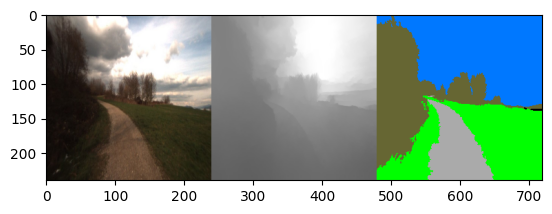

In [36]:
import torchvision.transforms as Tr
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
i=3

rgb,dsm,mask,id = loader[i]

RGB_IMG = Tr.ToPILImage()(rgb)
rgb_img = np.array(RGB_IMG,dtype=np.uint8)
print(rgb_img.shape)

DSM_IMG = Tr.ToPILImage()(dsm)
dsm_img = DSM_IMG.convert('RGB')
dsm_img = np.array(dsm_img,dtype=np.uint8)
print(dsm_img.shape)

print(mask.shape)
max_id = np.argmax(mask,axis=0)
print(max_id.size())
mask_img = conv_mask_to_img_np(max_id)

mask_img = np.array(mask_img,dtype=np.uint8)
print(mask_img.shape)

img = np.concatenate((rgb_img,dsm_img,mask_img),axis=1)
plt.imshow(img)
#plt.imshow(rgb_img)

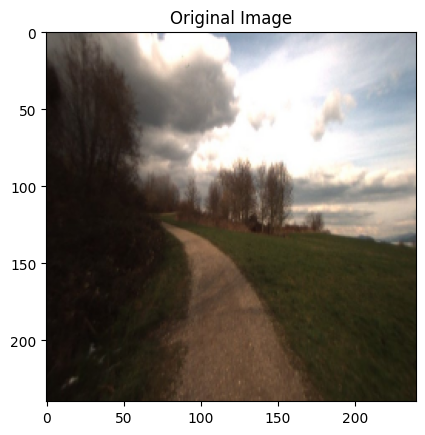

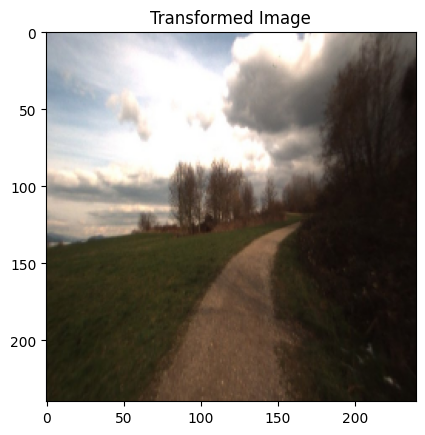

In [37]:
def Show_Image(Image, Picture_Name):
    plt.imshow(Image)
    plt.title(Picture_Name)
    plt.show()

Transform = Tr.Compose([
        Tr.ToPILImage(),
        Tr.RandomHorizontalFlip(p=1),
        #Tr.ColorJitter(brightness=1, contrast=0.5,saturation=0),
       ] )

rgb,dsm,mask,id = loader[i]
RGB_IMG = Tr.ToPILImage()(rgb)

# Testing The Transformation...
Transform_Img = Transform(rgb_img)
Show_Image(RGB_IMG, 'Original Image')
Show_Image(Transform_Img, 'Transformed Image')

#img = np.concatenate((RGB_IMG,Transform_Img))
#plt.imshow(img)

In [9]:
print(Transform_Img.size)

(240, 240)


In [38]:
# 
rgb_batch = rgb.unsqueeze(dim=0)
# Prediction 
pred,_ = model(rgb_batch)
pred = pred.detach().numpy()
print(pred.shape)

(1, 7, 240, 240)


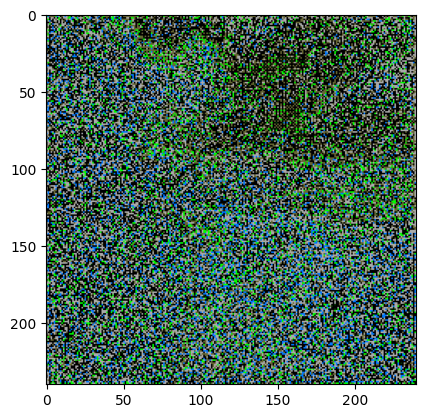

In [39]:
# Convert prediction to rgb mask
pred = pred.squeeze()
pred_id = np.argmax(pred,axis=0)
pred_img = conv_mask_to_img_np(pred_id)
pred_img = np.array(pred_img,dtype=np.uint8)
plt.imshow(pred_img)

In [40]:
from torchmetrics.classification import MulticlassJaccardIndex
metric = MulticlassJaccardIndex(num_classes=7, average='micro') #micro(best), macro, weighted, none
mask=max_id.long()
pred_tensor = torch.from_numpy(pred_id)
#pred_ltensor=pred_tensor.long()

print(metric(pred_tensor, pred_tensor))
print(metric(mask, mask))
print(metric(pred_tensor, mask))
print(metric(mask, pred_tensor))

tensor(1.)
tensor(1.)
tensor(0.0539)
tensor(0.0539)
